/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_99205/3584942142.py:15: DtypeWarning: Columns (2,3,5,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  policy_data = pd.read_csv('../DataFiles/2024-srcsc-superlife-inforce-dataset.csv')


36961

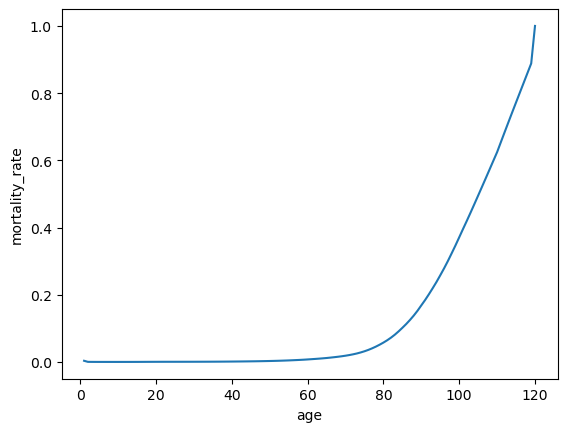

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


mr = pd.read_csv('../DataFiles/mortality_rate.csv')

sns.lineplot(data = mr, x = 'age', y = 'mortality_rate')

econ_data = pd.read_csv('../DataFiles/economic_data.csv')

econ_data

policy_data = pd.read_csv('../DataFiles/2024-srcsc-superlife-inforce-dataset.csv')

policy_data = policy_data.drop([0,1])
policy_data.index = range(0, policy_data.shape[0])
policy_data.columns = policy_data.iloc[0,:]
policy_data = policy_data.drop([0])

policy_data.columns = [c.replace('.','_').lower() for c in policy_data.columns]

policy_data.death_indicator.describe()

policy_data.death_indicator.value_counts().index

policy_data.death_indicator.shape[0]- sum([1 if i == 1 else 0 for i in policy_data.death_indicator.isna()])

policy_data.death_indicator.shape[0]- sum([0 if i == 1 else 1 for i in policy_data.death_indicator])

In [19]:
policy_data.lapse_indicator.fillna(0)

1         1
2         0
3         1
4         1
5         1
         ..
978578    0
978579    0
978580    0
978581    0
978582    0
Name: lapse_indicator, Length: 978582, dtype: object

In [20]:
policy_data.year_of_lapse[policy_data.lapse_indicator=='Y'].unique()
# a lapse indicator of 'Y' is also associated with a year of lapse

array([2017.0, 2020.0, 2011.0, 2010.0, 2015.0, 2008.0, 2009.0, 2022.0,
       2013.0, 2012.0, 2019.0, 2018.0, 2014.0, 2021.0, 2016.0, 2023.0],
      dtype=object)

In [21]:
policy_data.death_indicator = policy_data.death_indicator.fillna(0)
policy_data.lapse_indicator[policy_data.lapse_indicator == 'Y'] = 1

In [22]:
policy_data.death_indicator = policy_data.death_indicator.fillna(0)

In [23]:
policy_data = policy_data.astype({'issue_year':'int', 'issue_age':'int',
    'face_amount':'int',  'year_of_death':'float', 'death_indicator': 'float',
    'year_of_lapse':'float', 'lapse_indicator': 'float', 'region':'int'})

                 # 'year_of_death':'int', 'lapse_indicator': 'int', 
                 # 'year_of_lapse':'int'})

In [24]:
policy_data.region.unique()

array([1, 6, 2, 3, 4, 5])

In [25]:
policy_data.sex.unique()

array(['F', 'M'], dtype=object)

In [26]:
policy_data.columns

Index(['policy_number', 'policy_type', 'issue_year', 'issue_age', 'sex',
       'face_amount', 'smoker_status', 'underwriting_class', 'urban_vs_rural',
       'region', 'distribution_channel', 'death_indicator', 'year_of_death',
       'lapse_indicator', 'year_of_lapse', 'cause_of_death'],
      dtype='object')

In [27]:
# Convert variables to indicators and ordinals

policy_data = policy_data.convert_dtypes()

conversions = {'sex': {'F': 0, 'M': 1},
'underwriting_class': {'very low risk': 0, 'low risk': 1, 'moderate risk': 2,
'high risk': 3},
'urban_vs_rural': {'Urban': 0, 'Rural': 1},
'smoker_status': {'NS':0, 'S':1}}

In [28]:
for c in list(conversions.keys()):
    policy_data[c] = [conversions[c][val] for val in policy_data[c]]

In [29]:
policy_data['age_at_death'] = policy_data['year_of_death'] - \
    policy_data['issue_year'] + policy_data['issue_age']
policy_data['age_at_lapse'] = policy_data['year_of_lapse'] - \
    policy_data['issue_year'] + policy_data['issue_age']

([<matplotlib.axis.XTick at 0x7fb6d8557f10>,
 [Text(0, 0, '26'),
  Text(8, 0, '34'),
  Text(16, 0, '42'),
  Text(24, 0, '50'),
  Text(32, 0, '58'),
  Text(40, 0, '66'),
  Text(48, 0, '74'),
  Text(56, 0, '82')])

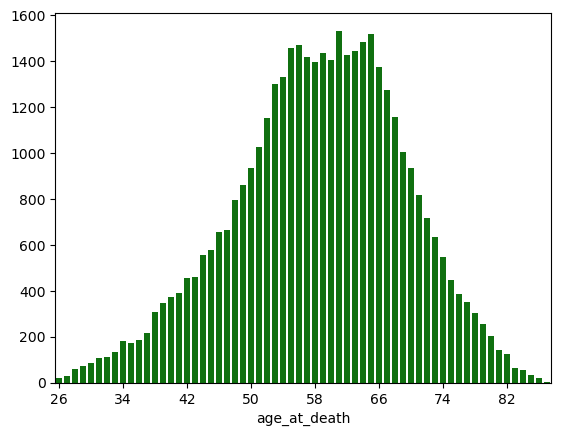

In [30]:
sns.barplot(x = policy_data['age_at_death'].value_counts().index, 
           y = policy_data['age_at_death'].value_counts().values, color = 'g')
plt.xticks(ticks = np.arange(0,88-26,8))

In [40]:
policy_data[(policy_data.death_indicator == 1) &  
(policy_data.lapse_indicator == 1)]
# no policies that have lapsed have death info.

,policy_number,policy_type,issue_year,issue_age,sex,face_amount,smoker_status,underwriting_class,urban_vs_rural,region,distribution_channel,death_indicator,year_of_death,lapse_indicator,year_of_lapse,cause_of_death,age_at_death,age_at_lapse


In [59]:
# determine number of years each policy was in effect
policy_data['years_in_effect'] = 0
policy_data.loc[policy_data.death_indicator == 1,'years_in_effect'] = \
    policy_data.year_of_death - policy_data.loc[
        policy_data.death_indicator == 1, 'issue_year']

policy_data.loc[policy_data.lapse_indicator == 1,'years_in_effect'] = \
    policy_data.year_of_lapse - policy_data.loc[
        policy_data.lapse_indicator == 1, 'issue_year']

policy_data.loc[((policy_data.lapse_indicator != 1) & 
                  (policy_data.death_indicator != 1)), 'years_in_effect'] = \
     2023 - policy_data.loc[((policy_data.lapse_indicator != 1) & 
                  (policy_data.death_indicator != 1)),'issue_year']

In [ ]:
de

In [121]:
policy_data.columns

Index(['policy_number', 'policy_type', 'issue_year', 'issue_age', 'sex',
       'face_amount', 'smoker_status', 'underwriting_class', 'urban_vs_rural',
       'region', 'distribution_channel', 'death_indicator', 'year_of_death',
       'lapse_indicator', 'year_of_lapse', 'cause_of_death', 'age_at_death',
       'age_at_lapse', 'years_in_effect', 'age_max'],
      dtype='object')

In [ ]:
for age in range

In [120]:
policy_data[policy_data.max_age >= 10]

,policy_number,policy_type,issue_year,issue_age,sex,face_amount,smoker_status,underwriting_class,urban_vs_rural,region,distribution_channel,death_indicator,year_of_death,lapse_indicator,year_of_lapse,cause_of_death,age_at_death,age_at_lapse,years_in_effect,age_max
1,O8FN60R4KXIS,T20,2001,54,0,100000,0,2,0,1,Telemarketer,0,<NA>,1,2020,<NA>,<NA>,73,19,54
2,K0JK2XD81ZNI,SPWL,2001,54,1,1000000,0,2,1,6,Agent,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,54
3,AH3A98MHTO8H,T20,2001,27,0,50000,0,0,0,1,Telemarketer,0,<NA>,1,2020,<NA>,<NA>,46,19,27
4,C9QPJMIH8H9Y,T20,2001,55,0,2000000,0,0,1,2,Telemarketer,0,<NA>,1,2020,<NA>,<NA>,74,19,55
5,2C1HL2XQOWME,T20,2001,39,0,250000,0,2,0,6,Agent,0,<NA>,1,2020,<NA>,<NA>,58,19,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978578,20B62UZVBXMQ,SPWL,2023,52,1,250000,0,0,0,3,Agent,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,52
978579,XQ6FHVTCLZ0B,SPWL,2023,42,1,250000,0,0,0,2,Telemarketer,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,42
978580,Q75O3VLJ3PF7,T20,2023,47,0,2000000,0,2,1,6,Agent,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,47
978581,3ABYOUPRL8D1,SPWL,2023,47,0,2000000,0,0,0,6,Agent,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,47


In [ ]:
policy_data[policy_data.issue_age >= 

In [ ]:
policy_data.

In [63]:
max(policy_data['years_in_effect'].values)

22

In [ ]:
def policy_check(policy, death_lapse):
    policy.

find p_x_t, q_x_t

In [88]:
policy_data.issue_age.max()

65

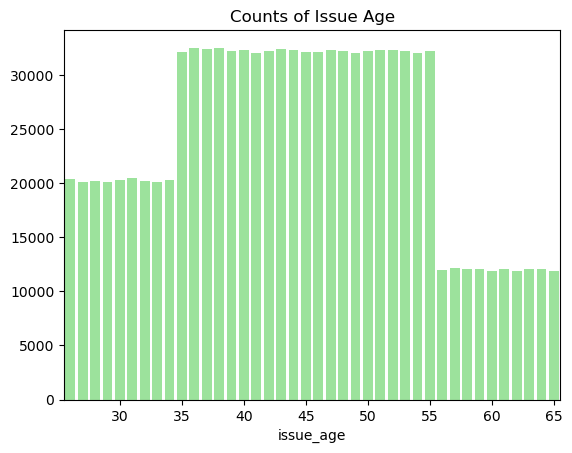

In [98]:
max_age = policy_data.issue_age.max()
min_age = policy_data.issue_age.min()
bp = sns.barplot(x = policy_data.issue_age.value_counts().sort_index().index, 
           y= policy_data.issue_age.value_counts().sort_index().values,
           color = 'lightgreen')
bp.set_title('Counts of Issue Age')
bp.set_xticks(np.arange(4,max_age-min_age+1,5))

In [107]:
policy_data['age_at_death'].value_counts().sort_index(ascending = False)

age_at_death
87     2
86    20
85    31
84    56
83    64
      ..
30    87
29    71
28    58
27    28
26    20
Name: count, Length: 62, dtype: Int64

In [119]:
policy_data['years_in_effect'].value_counts().sort_index()

years_in_effect
0     836056
1       8182
2       7965
3       7538
4       6960
5       6441
6       6314
7       5811
8       5499
9       5168
10      4733
11      4272
12      3924
13      3585
14      3202
15      2824
16      2423
17      2052
18      1654
19     53519
20       234
21       158
22        68
Name: count, dtype: int64

In [114]:
policy_data['age_max'] = policy_data.years_in_effect + policy_data.issue_age

In [115]:
policy_data['age_max'].value_counts().sort_index(ascending=False)

age_max
65    11830
64    12099
63    12025
62    11843
61    12061
60    11884
59    12078
58    12035
57    12115
56    11938
55    32188
54    32042
53    32225
52    32259
51    32241
50    32196
49    32010
48    32175
47    32285
46    32103
45    32071
44    32254
43    32398
42    32191
41    31983
40    32312
39    32190
38    32496
37    32358
36    32507
35    32075
34    20298
33    20105
32    20179
31    20436
30    20318
29    20098
28    20218
27    20109
26    20354
Name: count, dtype: Int64

In [56]:
def mort_table(policy_data = policy_data, max_yrs = 22):
    for i in range(0, max_yrs + 1):
        p_x_t_life
        p_x_t_no_lapse
        

1          True
2         False
3          True
4          True
5          True
          ...  
978578    False
978579    False
978580    False
978581    False
978582    False
Name: years_in_effect, Length: 978582, dtype: bool

In [45]:
policy_data

,policy_number,policy_type,issue_year,issue_age,sex,face_amount,smoker_status,underwriting_class,urban_vs_rural,region,distribution_channel,death_indicator,year_of_death,lapse_indicator,year_of_lapse,cause_of_death,age_at_death,age_at_lapse,years_in_effect
1,O8FN60R4KXIS,T20,2001,54,0,100000,0,2,0,1,Telemarketer,0,<NA>,1,2020,<NA>,<NA>,73,0
2,K0JK2XD81ZNI,SPWL,2001,54,1,1000000,0,2,1,6,Agent,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
3,AH3A98MHTO8H,T20,2001,27,0,50000,0,0,0,1,Telemarketer,0,<NA>,1,2020,<NA>,<NA>,46,0
4,C9QPJMIH8H9Y,T20,2001,55,0,2000000,0,0,1,2,Telemarketer,0,<NA>,1,2020,<NA>,<NA>,74,0
5,2C1HL2XQOWME,T20,2001,39,0,250000,0,2,0,6,Agent,0,<NA>,1,2020,<NA>,<NA>,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978578,20B62UZVBXMQ,SPWL,2023,52,1,250000,0,0,0,3,Agent,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
978579,XQ6FHVTCLZ0B,SPWL,2023,42,1,250000,0,0,0,2,Telemarketer,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
978580,Q75O3VLJ3PF7,T20,2023,47,0,2000000,0,2,1,6,Agent,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
978581,3ABYOUPRL8D1,SPWL,2023,47,0,2000000,0,0,0,6,Agent,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [31]:
policy_data['years_in_effect'] = np.min(2023,
    np.min(policy_data['year_of_death'], policy_data['year_of_lapse'])) - \
    policy_data['issue_year']
    

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_99205/584069087.py", line 2, in <module>
    np.min(policy_data['year_of_death'], policy_data['year_of_lapse'])) - \
  File "<__array_function__ internals>", line 200, in amin
  File "/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py", line 2946, in amin
    return _wrapreduction(a, np.minimum, 'min', axis, None, out,
  File "/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py", line 84, in _wrapreduction
    return reduction(axis=axis, out=out, **passkwargs)
  File "/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py", line 11669, in min
    return NDFrame.min(self, axis, skipna, numeric_only, **kwargs)
 